-------
-------
## Import Some Libraries that We Need!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [2]:
#!pip show numpy

In [3]:
#!pip show pandas

In [4]:
#!pip show matplotlib

In [5]:
#!pip show seaborn

-----
## Defines the Dataset

In [6]:
data = pd.read_csv("heart_failure_clinical_records.csv")

In [7]:
data.sample(25)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
94,58.000,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
103,42.000,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
287,45.000,0,582,1,55,0,543000.00,1.00,132,0,0,250,0
41,50.000,0,124,1,30,1,153000.00,1.20,136,0,1,32,1
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
60,45.000,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
61,50.000,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
106,55.000,0,748,0,45,0,263000.00,1.30,137,1,0,88,0
35,69.000,0,582,1,35,0,228000.00,3.50,134,1,0,30,1
126,46.000,0,168,1,17,1,271000.00,2.10,124,0,0,100,1


## Dataset Descriptions

    * Age                      : The patient's age (years)
    * Anemia                   : Decrease of red blood cells or hemoglobin
    * Creatinine Phosphokinase : Level of CPK enyme in the blood (mcg/L)
    * Diabetes                 : If the patient has diabetes diagnosis
    * Ejection Fraction        : Percentage of blood leaving the heart 
                                 at each contraction
    * High Blood Pressure      : If the patient has hypertension diagnosis
    * Platelets                : Platelets in the blood (kiloplatelets/mL)
    * Serum Creatinine         : Level of creatinine in the blood (mg/dL)
    * Serum Sodium             : Level of sodium in the blood (mEq/L)
    * Sex                      : Patient genders (woman/man)
    * Smoking                  : If the patient smokes
    * Time                     : Follow-up period (days)
    * Death Event              : If the patient died during the follow-up period

In [8]:
data.shape

(299, 13)

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Preprocessing Data

Handling of Imbalancing Data

In [10]:
data["death_event"] = data["DEATH_EVENT"].map({1:"dead", 0:"survival"})

death_event
survival    203
dead         96
Name: count, dtype: int64


<Axes: xlabel='death_event', ylabel='count'>

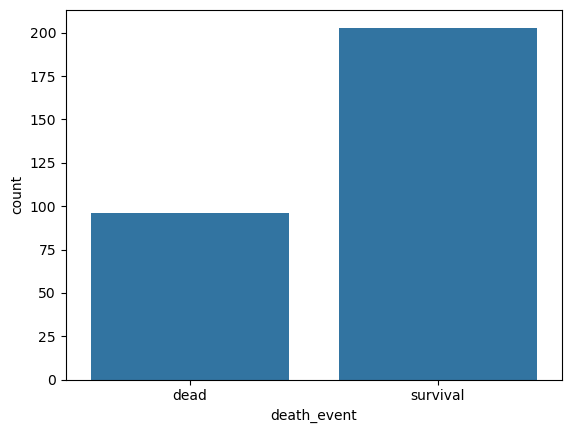

In [11]:
print(data["death_event"].value_counts())
sb.countplot(data, x="death_event")

In [12]:
print("The percentage of dead are: ", 96/299)
print("The percentage of survival are: ", 203/299)

The percentage of dead are:  0.3210702341137124
The percentage of survival are:  0.6789297658862876


    * Base on the visualization above we can see the proportion of DEATH_EVENT values. 
      The values count shows us that the numer of 0 category is 203 and 
      for the 1 category is 96.
      We can say the proportion is almost 2:1 or we can say is still balancing.
    * Base on the proportion we can conclude if we only depend on the accuracy score it 
      might be giving us the accuracy paradox, then we will see at 
      the precision, recall, and f1-score metrics 
      to minimize the impact of this diagnosis

Handling of Missing Data/Value

In [13]:
data.shape

(299, 14)

In [14]:
#First way to check the missing data/values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  death_event               299 non-null    object 
dtypes: float64

In [15]:
# Second way to check the missing data/values 
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
death_event                 0
dtype: int64

    * The dataset we have is complete, means there is no missing value in the dataset
    * Base on the shape of the data we 300 rows and 13 columns or features and 
      there is no null value if we see at the first and second way 
      how to detect the missing data/values

Outlier Analysis and Data Transformation

    In this case we will use three ways to detect/analyze the outliers. 
    The three ways are Z-Score, Inter Quartile Range (IQR), and Boxplots. 
    There are many ways to detect  ouliers but the simplest are them. 
    Each of method has the pros and cons, and if you ask me the best way to use is
    really depends on the kind of data you handle!

A. Outlier Analysis Using Z-Score

In [16]:
outliers = []

def detect_outliers_with_zscore(feature):
    thres = 3
    mean = np.mean(feature)
    std = np.std(feature)
    
    for data in feature:
        z_score = (data - mean) / std
        if (np.abs(z_score) > thres):
            outliers.append(data)
    return outliers      
    print("The outliers for the feature are: ", outliers)

In [17]:
print(detect_outliers_with_zscore(data["serum_creatinine"]))
print(detect_outliers_with_zscore(data["ejection_fraction"]))

[9.4, 5.8, 6.8, 6.1, 9.0, 5.0]
[9.4, 5.8, 6.8, 6.1, 9.0, 5.0, 80]


B. Outlier Analysis Using Inter Quartile Range (IQR)

In [18]:
outliers = []

def detect_outliers_with_iqr(feature):
    feature = sorted(feature)
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    for data in feature:
        if (data < lower_bound) or (data > upper_bound):
            outliers.append(data)
            
    print("The outliers for the feature are: ", outliers)

In [19]:
print(detect_outliers_with_iqr(data["serum_creatinine"]))
print(detect_outliers_with_iqr(data["ejection_fraction"]))

The outliers for the feature are:  [2.2, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.5, 2.5, 2.7, 2.7, 2.7, 2.9, 3.0, 3.0, 3.2, 3.4, 3.5, 3.5, 3.7, 3.8, 4.0, 4.4, 5.0, 5.8, 6.1, 6.8, 9.0, 9.4]
None
The outliers for the feature are:  [2.2, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.5, 2.5, 2.7, 2.7, 2.7, 2.9, 3.0, 3.0, 3.2, 3.4, 3.5, 3.5, 3.7, 3.8, 4.0, 4.4, 5.0, 5.8, 6.1, 6.8, 9.0, 9.4, 70, 80]
None


C. Outlier Analysis with Boxplot

<Axes: >

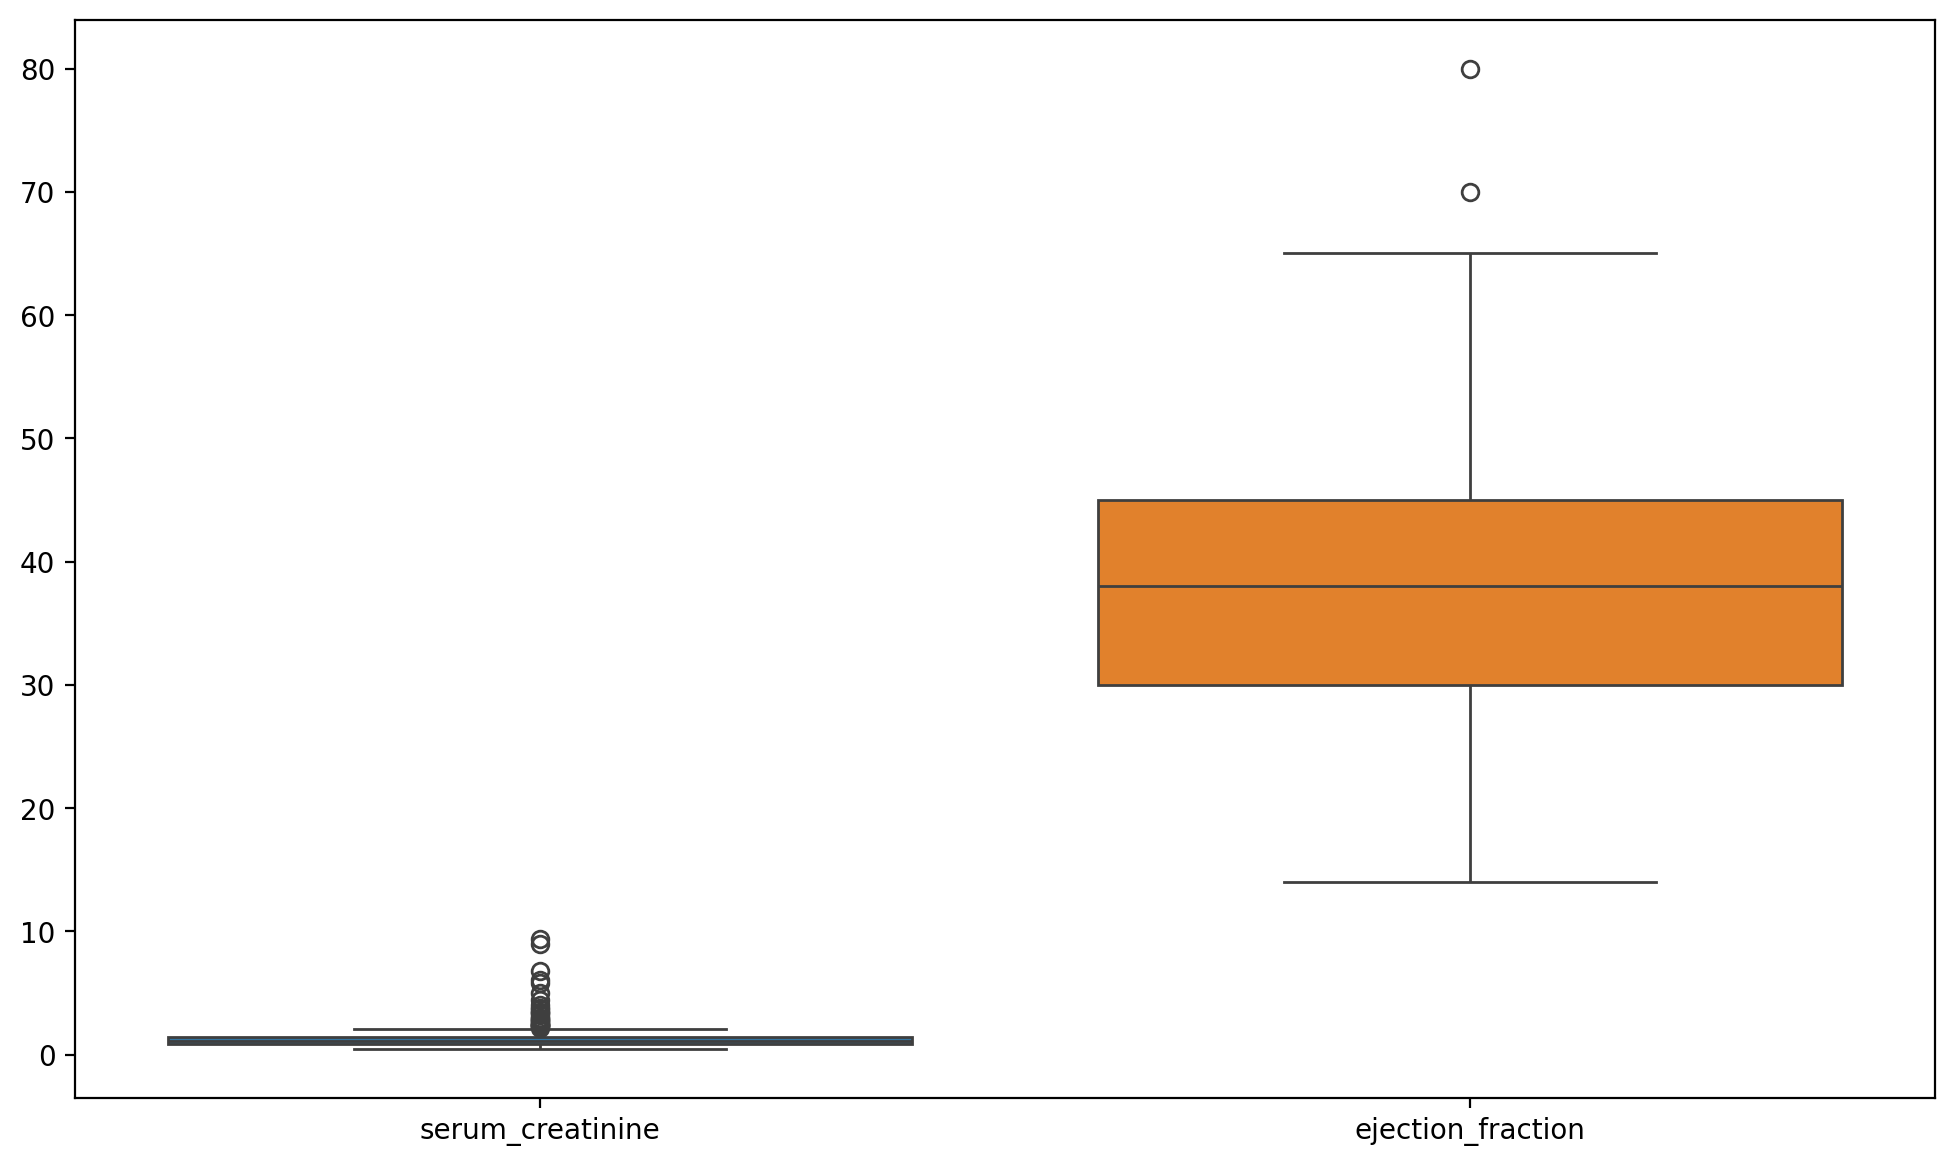

In [20]:
plt.figure(figsize=(12,7), dpi=200)
sb.boxplot(data[["serum_creatinine", "ejection_fraction"]])

<Axes: >

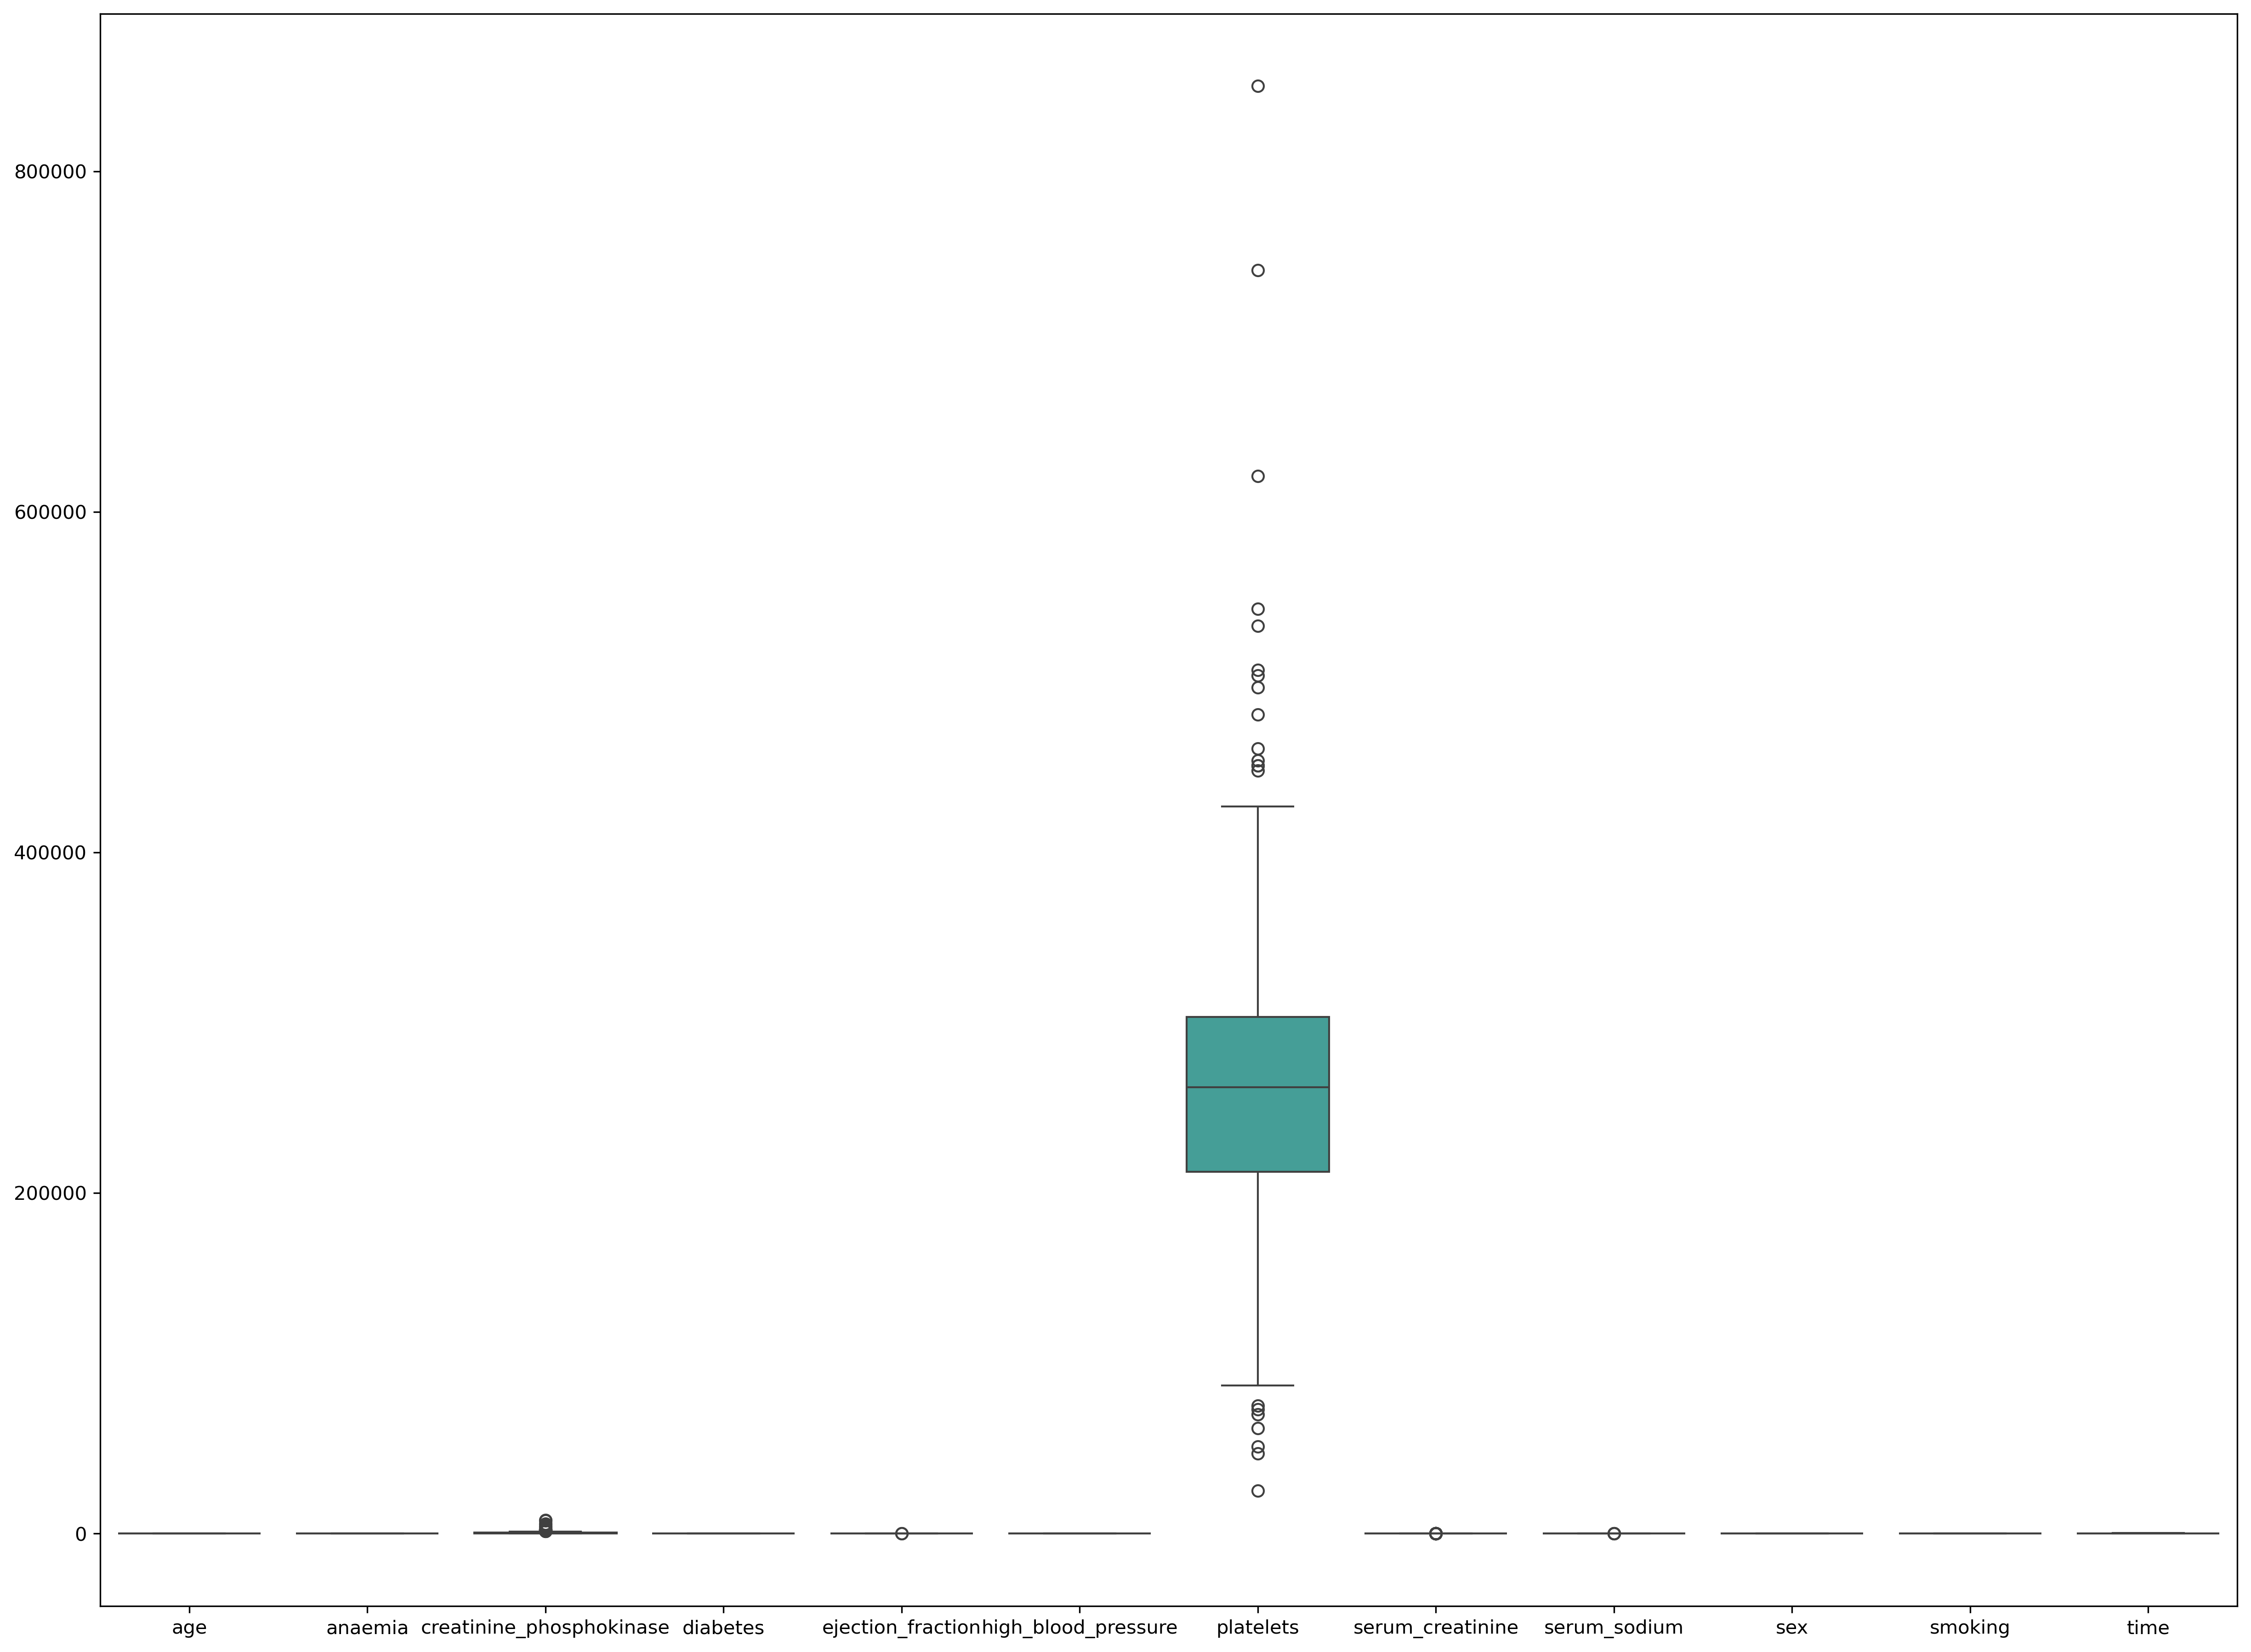

In [21]:
plt.figure(figsize=(20,15), dpi=300)
sb.boxplot(data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                 'ejection_fraction', 'high_blood_pressure', 'platelets',
                 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']])

    Base on the outliers analysis for the some features we got it outliers.
    To know what is the impact for the outliers we can say from the model performace.
    The model performance will show in the model evaluation and testing.

Data Transformation | General Treatment for the Outliers

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [23]:
first_scaler = StandardScaler()
second_scaler = MinMaxScaler()
third_scaler = RobustScaler()

## Exploratory Data Analysis

    EDA goals are to know the distribution for each feature, 
    to know the correlation for each feature to each other and DEATH_EVENT, 
    and to reach some insights from each features.

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  death_event               299 non-null    object 
dtypes: float64

In [26]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


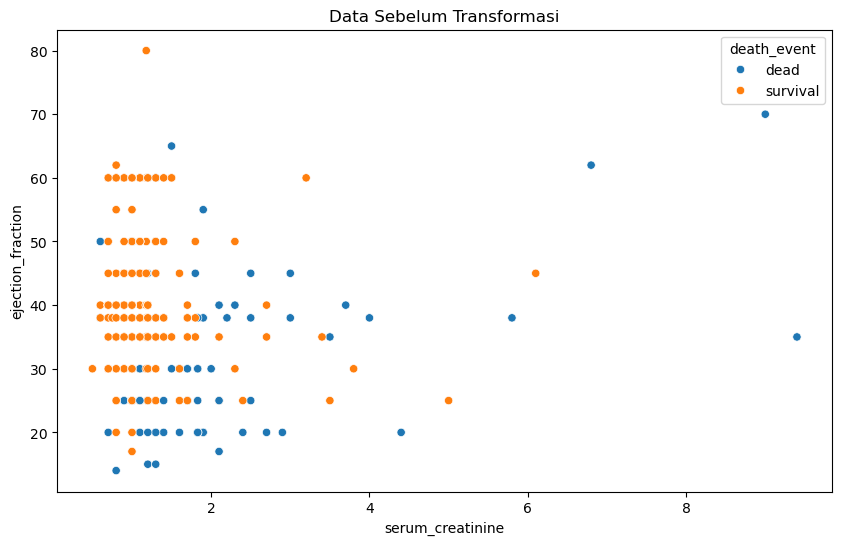

In [27]:
plt.figure(figsize=(10,6))
sb.scatterplot(data, x="serum_creatinine", y="ejection_fraction", hue="death_event")
plt.title("Data Sebelum Transformasi");

In [28]:
data_transform = data[["serum_creatinine", "ejection_fraction"]]

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
transformed = scaler.fit_transform(data_transform)

In [32]:
tf_table = pd.DataFrame(transformed, columns=["serum_creatinine", "ejection_fraction"])

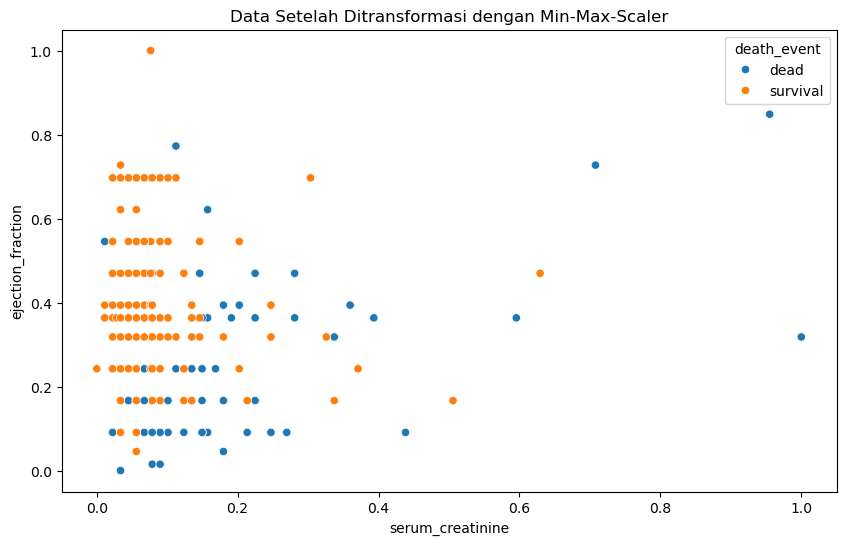

In [33]:
plt.figure(figsize=(10,6))
sb.scatterplot(tf_table, x="serum_creatinine", y="ejection_fraction", hue=data["death_event"])
plt.title("Data Setelah Ditransformasi dengan Min-Max-Scaler");

In [34]:
data1 = data[["age", "ejection_fraction"]]
data2 = data[["creatinine_phosphokinase", "platelets"]]
data3 = data[["serum_sodium", "time"]]

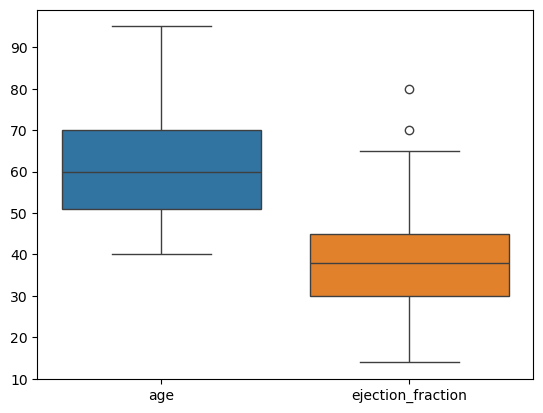

In [35]:
sb.boxplot(data1);

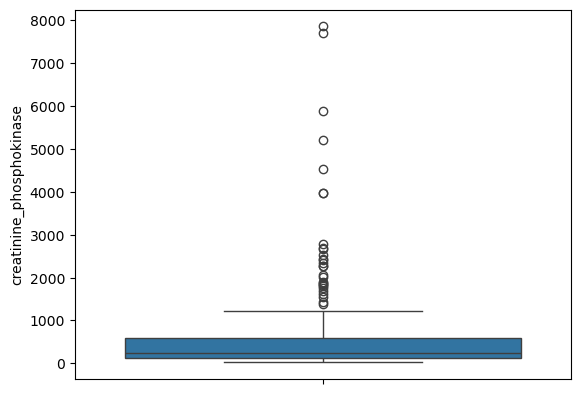

In [36]:
sb.boxplot(data["creatinine_phosphokinase"]);

<Axes: ylabel='platelets'>

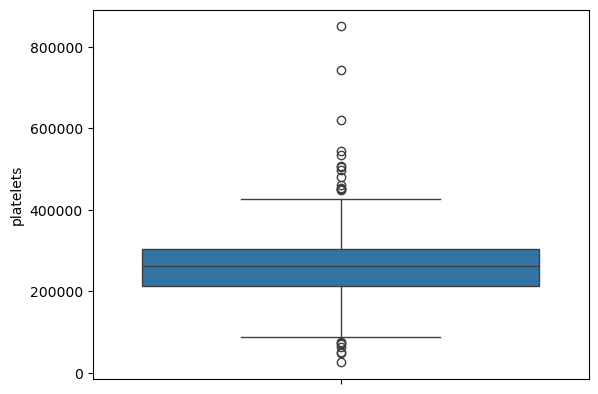

In [37]:
sb.boxplot(data["platelets"])

<Axes: >

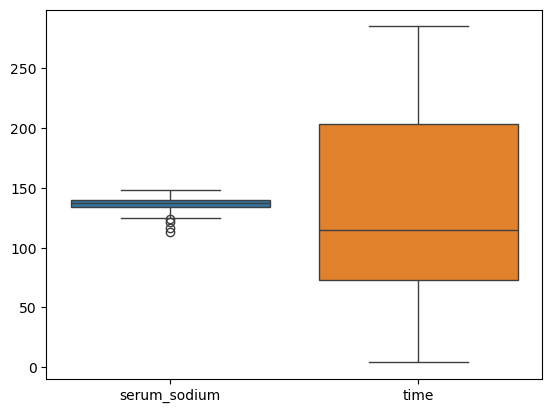

In [38]:
sb.boxplot(data3)

    As we can see at the sorting values of standard deviation for each feature, 
    we can conclude the feature that spreads the most is platetelets.

<Axes: xlabel='serum_creatinine', ylabel='Density'>

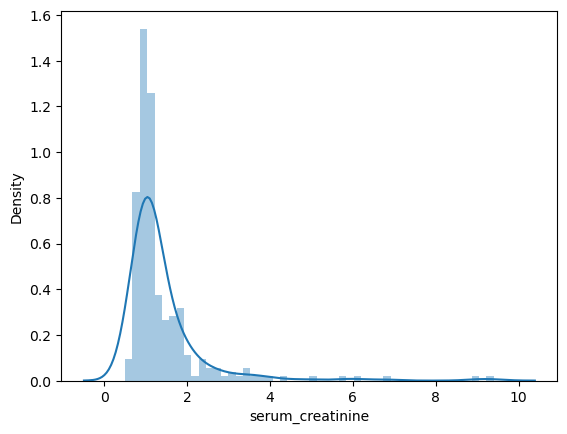

In [39]:
#heck the distribution
sb.distplot(data["serum_creatinine"], kde=True)

<Axes: xlabel='ejection_fraction', ylabel='Count'>

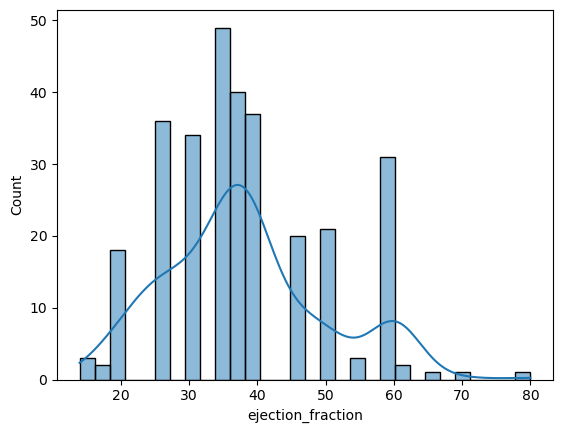

In [40]:
sb.histplot(data, x="ejection_fraction", kde=True, bins=30)

In [41]:
# plt.figure(figsize=(20,20), dpi=200)
# g = sb.PairGrid(data[['age', 'creatinine_phosphokinase',
#                       'ejection_fraction', 'platelets',
#                       'serum_creatinine', 'serum_sodium', 'time', 'death_event']], 
#                 hue='death_event')
# g = g.map_upper(sb.scatterplot)
# g = g.map_diag(sb.histplot)
# g = g.map_lower(sb.kdeplot)
# g = g.add_legend();

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  death_event               299 non-null    object 
dtypes: float64

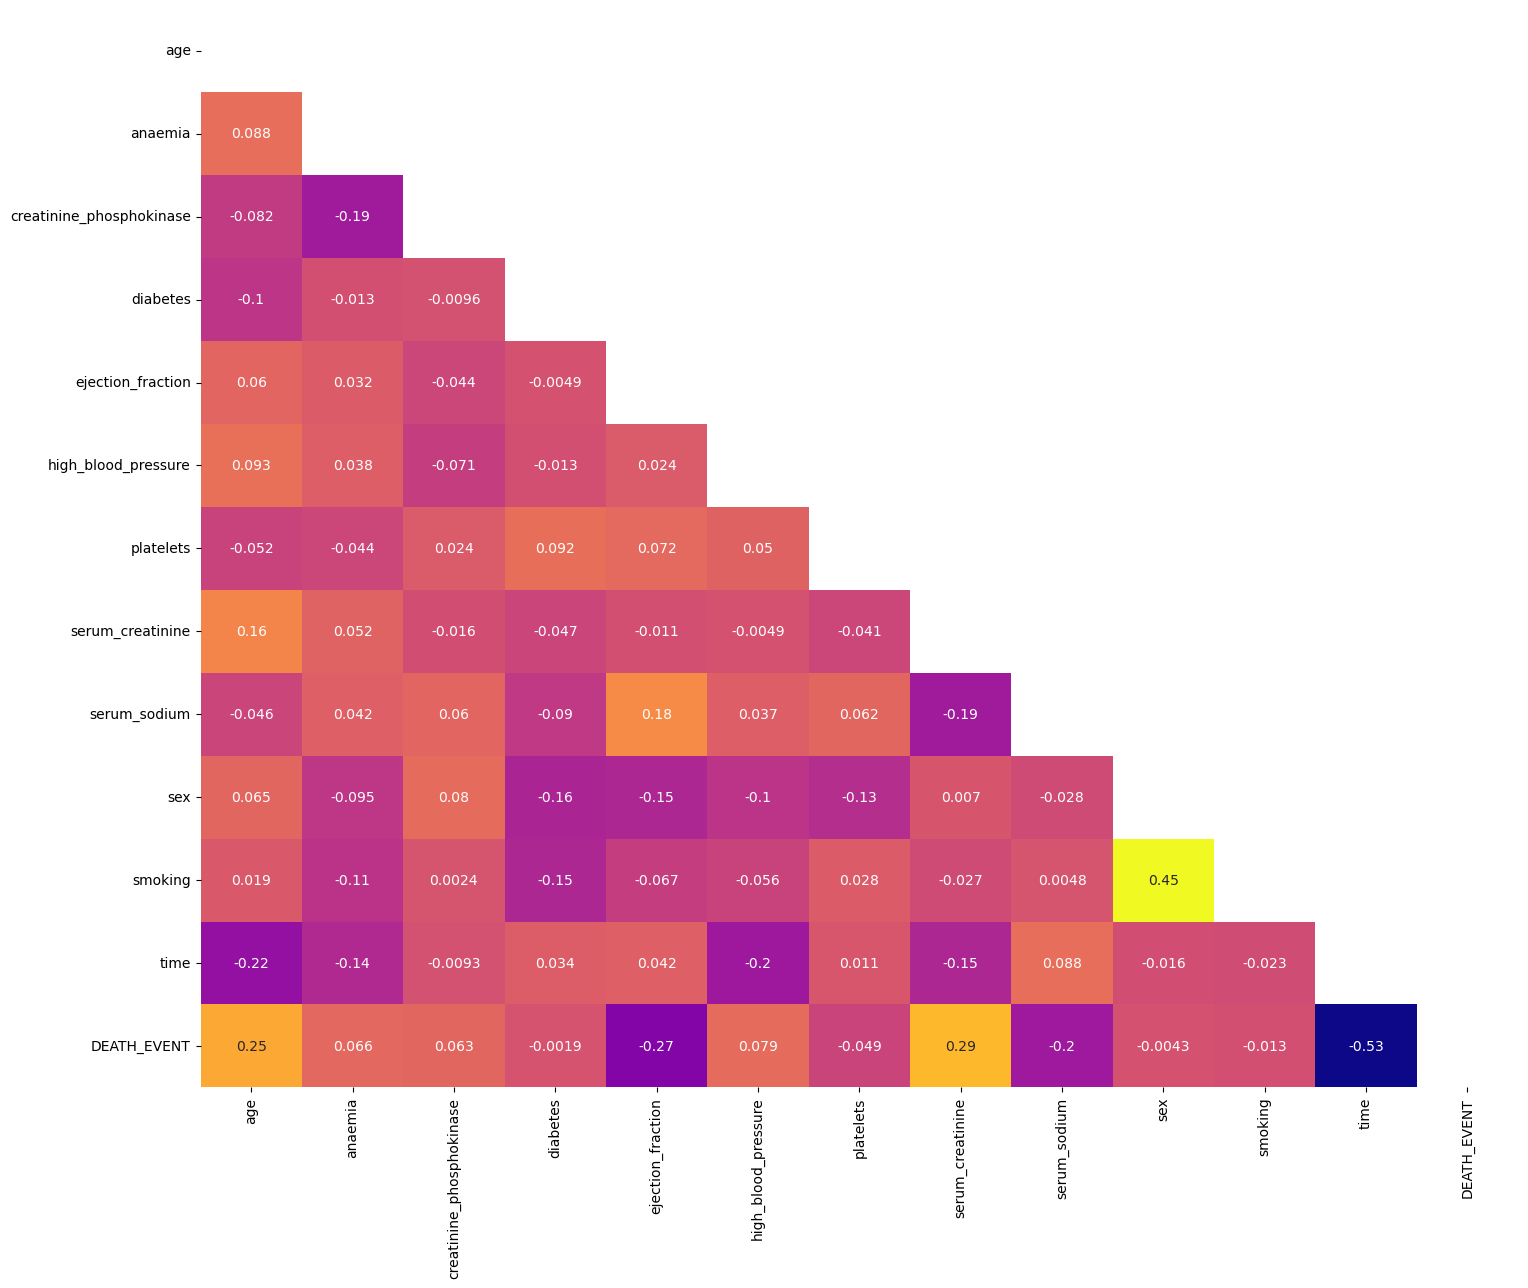

In [43]:
plt.figure(figsize=(17,14), dpi=100)
mask = np.triu(np.ones_like(data.drop("death_event", axis=1).corr()))
sb.heatmap(data.drop("death_event", axis=1).corr(), cbar=False, mask=mask, annot=True, cmap="plasma");

In [44]:
# plt.figure(figsize=(17,14), dpi=150)
# mask = np.triu(np.ones_like(data.drop("death_event", axis=1).corr()))
# plt.savefig("heatmapku.jpg")
# sb.heatmap(data.drop("death_event", axis=1).corr(), cbar=True, annot=True, cmap="plasma");

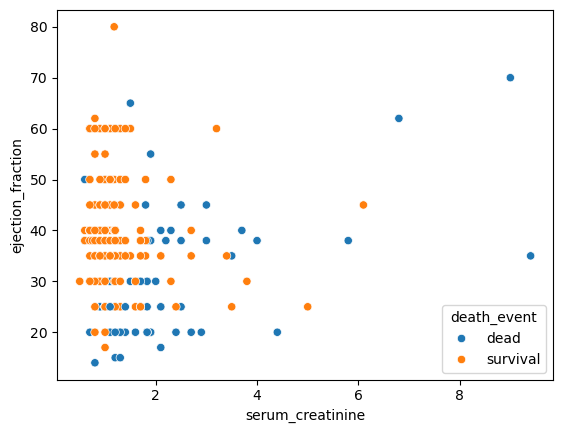

In [45]:
sb.scatterplot(data, x="serum_creatinine", y="ejection_fraction", hue="death_event");

In [46]:
#plt.figure(figsize=(7,5))

#sb.countplot(data, x="sex", hue="smoking");

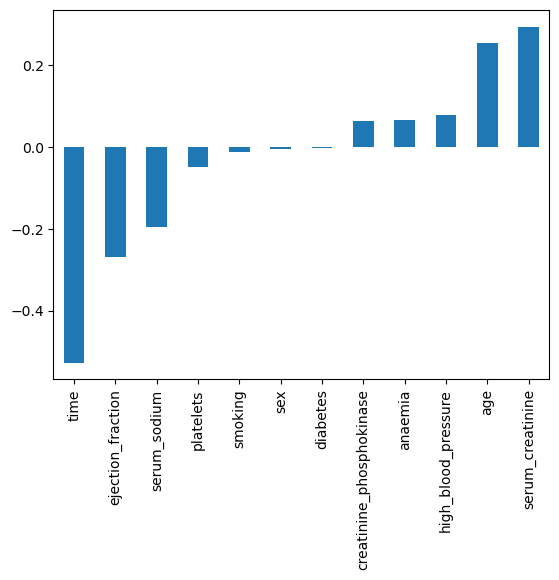

In [47]:
data.drop("death_event", axis=1).corr()["DEATH_EVENT"].sort_values().drop("DEATH_EVENT").plot(kind="bar", y=data.drop("death_event", axis=1).corr());

    Base on the visualization above, we can see that the most correlated with 
    the DEATH_EVENT is "serum_creatinine" and the least is "time"

In [48]:
data.groupby(["sex", "smoking"]).describe()

age                                                      \
             count       mean        std   min   25%   50%   75%   max   
sex smoking                                                              
0   0        101.0  59.650168  11.309325  40.0  50.0  60.0  65.0  95.0   
    1          4.0  63.000000  10.132456  50.0  57.5  65.0  70.5  72.0   
1   0        102.0  61.702618  12.917774  40.0  51.5  60.0  70.0  95.0   
    1         92.0  61.076087  11.468288  40.0  52.0  60.0  70.0  90.0   

            anaemia            ...    time        DEATH_EVENT            \
              count      mean  ...     75%    max       count      mean   
sex smoking                    ...                                        
0   0         101.0  0.495050  ...  207.00  278.0       101.0  0.306931   
    1           4.0  0.500000  ...   77.50   88.0         4.0  0.750000   
1   0         102.0  0.441176  ...  204.00  258.0       102.0  0.343137   
    1          92.0  0.347826  ...  200.25  285.0        92.0  0.293478   

                                                 
                  std  min   25%  50%  75%  max  
sex smoking                                      
0   0        0.463521  0.0  0.00  0.0  1.0  1.0  
    1        0.500000  0.0  0.75  1.0  1.0  1.0  
1   0        0.477101  0.0  0.00  0.0  1.0  1.0  
    1        0.457851  0.0  0.00  0.0  1.0  1.0  

[4 rows x 88 columns]

In [49]:
data.groupby("death_event").describe()["serum_creatinine"]

,count,mean,std,min,25%,50%,75%,max
death_event,,,,,,,,
dead,96.0,1.835833,1.468562,0.6,1.075,1.3,1.9,9.4
survival,203.0,1.184877,0.654083,0.5,0.900,1.0,1.2,6.1


<Axes: xlabel='death_event', ylabel='serum_creatinine'>

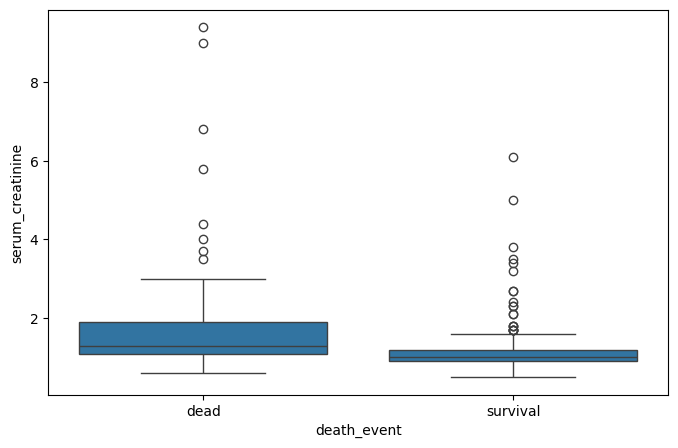

In [50]:
plt.figure(figsize=(8,5), dpi=100)
sb.boxplot(data, x="death_event", y="serum_creatinine")

<Axes: xlabel='death_event', ylabel='ejection_fraction'>

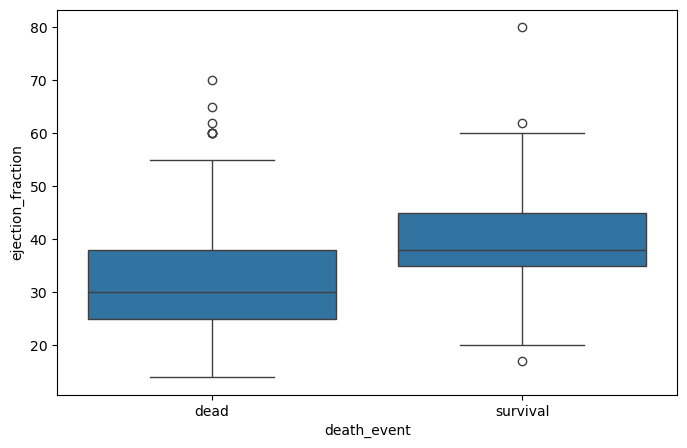

In [51]:
plt.figure(figsize=(8,5), dpi=100)
sb.boxplot(data, x="death_event", y="ejection_fraction")

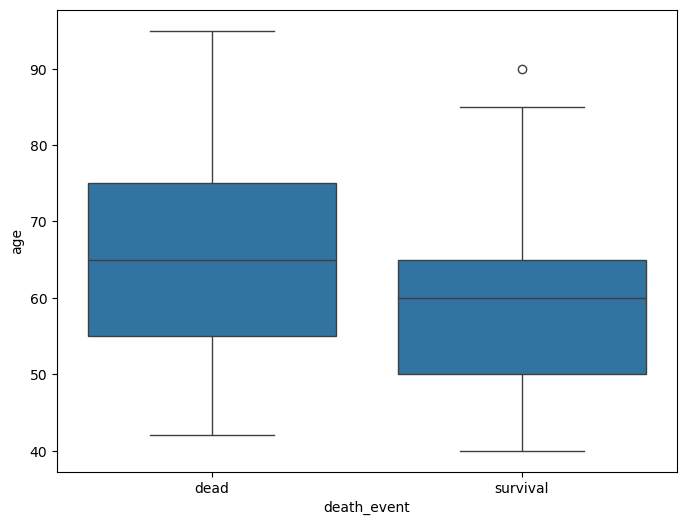

In [52]:
plt.figure(figsize=(8,6))
sb.boxplot(data, x="death_event", y="age");

In [53]:
#sb.countplot(data, x="high_blood_pressure", hue="sex")

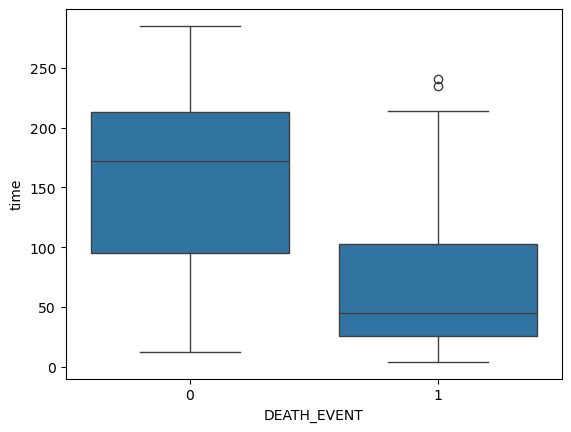

In [54]:
sb.boxplot(data, x="DEATH_EVENT", y="time");

In [55]:
#sb.countplot(data, x="smoking", hue="DEATH_EVENT")

In [56]:
#sb.boxplot(data, x="death_event", y="ejection_fraction")

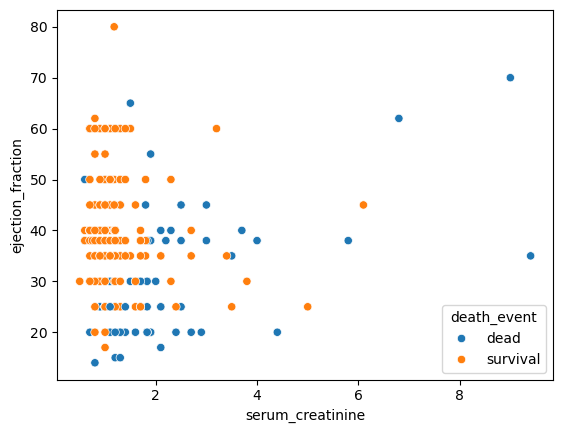

In [57]:
sb.scatterplot(data, x="serum_creatinine", y="ejection_fraction", hue="death_event");

## Train Test Split and Scaling | Transformation

In [58]:
data = pd.read_csv("heart_failure_clinical_records.csv")

In [59]:
X = data.drop("DEATH_EVENT", axis=1)
Y = data["DEATH_EVENT"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [62]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
189,40.0,0,244,0,45,1,275000.00,0.90,140,0,0,174
194,45.0,0,582,0,20,1,126000.00,1.60,135,1,0,180
158,85.0,1,910,0,50,0,235000.00,1.30,134,1,0,121
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10
33,50.0,1,159,1,30,0,302000.00,1.20,138,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
40,70.0,0,582,0,20,1,263358.03,1.83,134,1,1,31
75,60.0,1,47,0,20,0,204000.00,0.70,139,1,1,73
87,65.0,1,68,1,60,1,304000.00,0.80,140,1,0,79
63,45.0,0,582,0,35,0,385000.00,1.00,145,1,0,61


In [63]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [64]:
# sc = np.array(data["serum_creatinine"])

# normalized_sc = (sc - np.min(sc)) / (np.max(sc) - np.min(sc))
# df_sc = pd.DataFrame(normalized_sc, columns=["serum_creatinine"])

# data1 = pd.concat([df_sc, data["DEATH_EVENT"]], axis=1)
# sb.boxplot(data1, y="serum_creatinine", x="DEATH_EVENT")

In [65]:
scaled_X_train = second_scaler.fit_transform(X_train)
scaled_X_test = second_scaler.transform(X_test)

## Model Building | Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [67]:
#help(LogisticRegression)

In [68]:
logistic_model = LogisticRegression(max_iter=1000)

## GridSearch CV

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
solver = ["liblinear"]
multi_class = ["ovr"]
penalty_type = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0,1,50)
C = np.logspace(-5, 5, 10)

In [71]:
logistic_grid = GridSearchCV(logistic_model, param_grid={"solver":solver, 
                                                         "multi_class":multi_class,
                                                         "penalty":penalty_type,
                                                         "l1_ratio":l1_ratio,
                                                         "C":C})

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
logistic_grid.fit(scaled_X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.1836734...
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
                         'multi_class': ['ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear']})

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.1836734...
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
                         'multi_class': ['ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear']})

In [75]:
logistic_grid.best_params_

{'C': 3.593813663804626,
 'l1_ratio': 0.0,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [76]:
logistic_model = LogisticRegression(solver="liblinear", 
                                    penalty="l2", 
                                    multi_class="ovr", 
                                    l1_ratio=0.0, 
                                    C=3.593813663804626,
                                    max_iter=1000)

In [77]:
logistic_model.fit(X_train, Y_train)

LogisticRegression(C=3.593813663804626, l1_ratio=0.0, max_iter=1000,
                   multi_class='ovr', solver='liblinear')

In [78]:
log_preds1 = logistic_model.predict(X_test)
log_preds1

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
logistic_model.fit(scaled_X_train, Y_train)

LogisticRegression(C=3.593813663804626, l1_ratio=0.0, max_iter=1000,
                   multi_class='ovr', solver='liblinear')

In [80]:
logistic_preds = logistic_model.predict(scaled_X_test)
logistic_preds

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
#logistic_proba = logistic_model.predict_proba(scaled_X_test)
#logistic_proba

## Model Evaluation and Testing| Logistic Regression

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [83]:
print("The total accuracy of your model is: ",accuracy_score(Y_test, log_preds1))
print("\n")
print("The precision score of your model is: ",precision_score(Y_test, log_preds1))
print("\n")
print("The recall score of your model is: ",recall_score(Y_test, log_preds1))
print("\n")
print("The harmonic mean of your model is: ",f1_score(Y_test, log_preds1))

The total accuracy of your model is:  0.8666666666666667


The precision score of your model is:  0.7333333333333333


The recall score of your model is:  0.7333333333333333


The harmonic mean of your model is:  0.7333333333333333


In [84]:
print("The total accuracy of your model is: ",accuracy_score(Y_test, logistic_preds))
print("\n")
print("The precision score of your model is: ",precision_score(Y_test, logistic_preds))
print("\n")
print("The recall score of your model is: ",recall_score(Y_test, logistic_preds))
print("\n")
print("The harmonic mean of your model is: ",f1_score(Y_test, logistic_preds))

The total accuracy of your model is:  0.8666666666666667


The precision score of your model is:  0.7333333333333333


The recall score of your model is:  0.7333333333333333


The harmonic mean of your model is:  0.7333333333333333


In [85]:
print(classification_report(Y_test, logistic_preds))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.73      0.73      0.73        15

    accuracy                           0.87        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.87      0.87      0.87        60



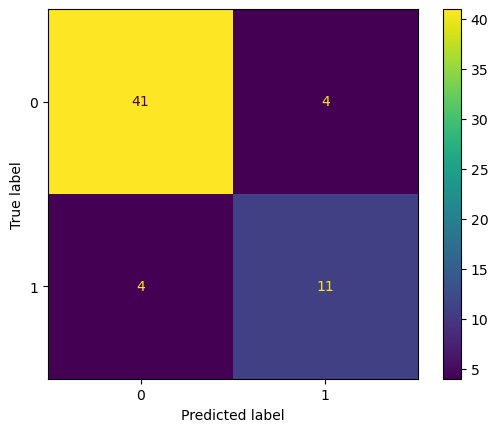

In [86]:
ConfusionMatrixDisplay.from_estimator(logistic_model, scaled_X_test, Y_test, cmap="viridis");

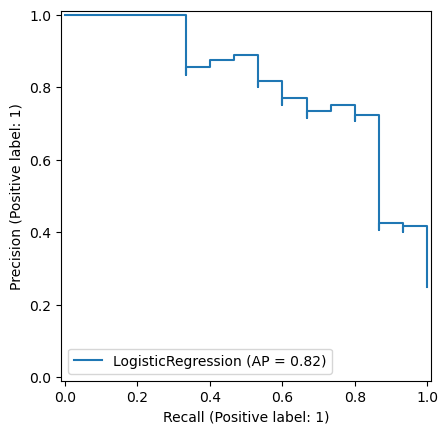

In [87]:
PrecisionRecallDisplay.from_estimator(logistic_model, scaled_X_test, Y_test);

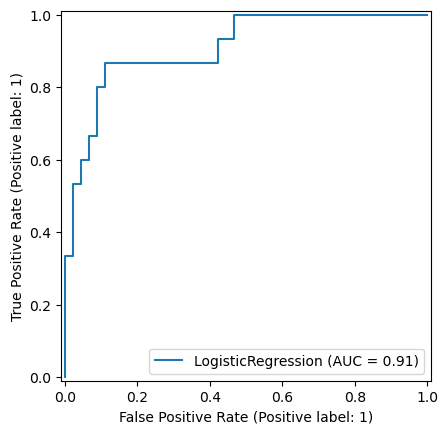

In [88]:
RocCurveDisplay.from_estimator(logistic_model, scaled_X_test, Y_test);

In [89]:
import statsmodels.formula.api as smf
result = smf.ols("""DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + diabetes
                  + ejection_fraction + high_blood_pressure + platelets
                  + serum_creatinine + serum_sodium + sex + smoking + time""",
                 data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.35e-27
Time:                        13:42:44   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.6636      0.695      2.392      0.017       0.295       3.032
age                          0.0058      0.002      3.088      0.002       0.002       0.009
anaemia                     -0.0028      0.044     -0.062      0.950      -0.090       0.085
creatinine_phosphokinase  3.427e-05   2.25e-05      1.525      0.128   -9.96e-06    7.85e-05
diabetes                     0.0193      0.044      0.437      0.662      -0.068       0.106
ejection_fraction           -0.0098      0.002     -5.333      0.000      -0.013      -0.006
high_blood_pressure         -0.0143      0.046     -0.313      0.754      -0.104       0.076
platelets                 -8.37e-08   2.21e-07     -0.379      0.705   -5.18e-07    3.51e-07
serum_creatinine             0.0853      0.021      4.017      0.000       0.043       0.127
serum_sodium                -0.0076      0.005     -1.513      0.131      -0.017       0.002
sex                         -0.0637      0.051     -1.247      0.214      -0.164       0.037
smoking                     -0.0057      0.051     -0.112      0.911      -0.106       0.095
time                        -0.0027      0.000     -9.415      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.068   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.014
Skew:                           0.306   Prob(JB):                       0.0182
Kurtosis:                       2.483   Cond. No.                     9.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
print("The intercept of your logistic_model is: ", logistic_model.intercept_)

The intercept of your logistic_model is:  [1.16756914]


In [91]:
coef = logistic_model.coef_.transpose()
index = data.columns[:-1]
col = ["Coefficient"]
table = pd.DataFrame(coef, index, columns=col)
table = table.sort_values("Coefficient")
table

,Coefficient
time,-4.255807
ejection_fraction,-3.496025
serum_sodium,-0.506894
sex,-0.342443
diabetes,0.090581
anaemia,0.090795
high_blood_pressure,0.113946
smoking,0.150780
platelets,0.286406
creatinine_phosphokinase,1.329585


<Figure size 3000x800 with 0 Axes>

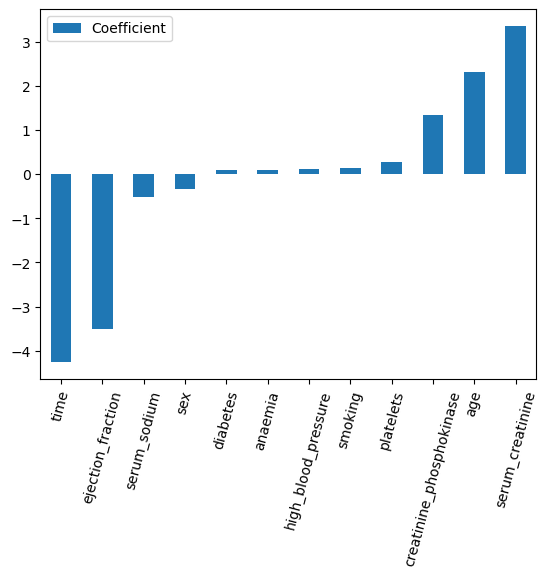

In [92]:
plt.figure(figsize=(15,4), dpi=200)
table.plot(kind="bar")
#plt.title("Besaran Koefisien tiap Fitur")
plt.xticks(rotation=75);

In [93]:
table

,Coefficient
time,-4.255807
ejection_fraction,-3.496025
serum_sodium,-0.506894
sex,-0.342443
diabetes,0.090581
anaemia,0.090795
high_blood_pressure,0.113946
smoking,0.150780
platelets,0.286406
creatinine_phosphokinase,1.329585


In [94]:
print("The odds of the serum_creatinine coefficient is: ", np.exp(3.352513))
print("The odds of the age coefficient is: ", np.exp(2.322351))
print("The odds of the creatinine_phosphokinase coefficient is: ", np.exp(1.329585))
print("The odds of the platelets coefficient is: ", np.exp(0.286406))
print("The odds of the smoking coefficient is: ", np.exp(0.150780))
print("The odds of the high_blood_pressure coefficient is: ", np.exp(0.113946))
print("The odds of the anaemia coefficient is: ", np.exp(0.090795))
print("The odds of the diabetes coefficient is: ", np.exp(0.090581))
print("The odds of the sex coefficient is: ", np.exp(-0.342443))
print("The odds of the serum_sodium coefficient is: ", np.exp(-0.506894))
print("The odds of the ejection_fraction coefficient is: ", np.exp(-3.496025))
print("The odds of the time coefficient is: ", np.exp(-4.255807))
print("The odds of the intercept coefficient is: ", np.exp(1.16756914))

The odds of the serum_creatinine coefficient is:  28.57445108864124
The odds of the age coefficient is:  10.199625459916351
The odds of the creatinine_phosphokinase coefficient is:  3.7794745801130025
The odds of the platelets coefficient is:  1.3316329885099505
The odds of the smoking coefficient is:  1.1627408269594974
The odds of the high_blood_pressure coefficient is:  1.1206916059034364
The odds of the anaemia coefficient is:  1.0950444981251548
The odds of the diabetes coefficient is:  1.0948101836750963
The odds of the sex coefficient is:  0.7100335901467619
The odds of the serum_sodium coefficient is:  0.6023636176425763
The odds of the ejection_fraction coefficient is:  0.03031765690660593
The odds of the time coefficient is:  0.014181641541721109
The odds of the intercept coefficient is:  3.2141699373010395


## Make A Predictions | Logistic Regression

In [95]:
patient = [[65. , 1. , 5761. , 0. , 62. , 1. , 350000. , 0.72 , 120. , 0. , 1. , 250. ]]

In [96]:
logistic_model.predict(patient)

array([1], dtype=int64)

In [97]:
logistic_model.predict_proba(patient)

array([[0., 1.]])

## Model Building | Support Vector Machine

In [98]:
from sklearn.svm import SVC

In [99]:
#help(SVC)

## GridSearch CV

In [100]:
kernel = ["linear", "poly", "rbf", "sigmoid"]
gamma = ["scale", "auto", np.logspace(-9, 3, 15)]
degree = [2,3,4,5,6]
C = np.logspace(0, 1, 50)
probability = [True]
random_state = [101]

In [101]:
svm_model = SVC(max_iter=1000, probability=True, random_state=101)

In [102]:
svm_grid = GridSearchCV(svm_model, param_grid={"kernel":kernel,
                                               "gamma":gamma,
                                               "degree":degree,
                                               "C" : C,
                                               "random_state":random_state})

In [103]:
svm_grid.fit(scaled_X_train, Y_train)

GridSearchCV(estimator=SVC(max_iter=1000, probability=True, random_state=101),
             param_grid={'C': array([ 1.        ,  1.04811313,  1.09854114,  1.1513954 ,  1.20679264,
        1.26485522,  1.32571137,  1.38949549,  1.45634848,  1.52641797,
        1.59985872,  1.67683294,  1.75751062,  1.84206997,  1.93069773,
        2.02358965,  2.12095089,  2.22299648,  2.32995181,  2.44205309,
        2.55954792,  2.6826958 ,  2.8117687 ,  2.9470517...
        8.28642773,  8.68511374,  9.10298178,  9.54095476, 10.        ]),
                         'degree': [2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto',
                                   array([1.00000000e-09, 7.19685673e-09, 5.17947468e-08, 3.72759372e-07,
       2.68269580e-06, 1.93069773e-05, 1.38949549e-04, 1.00000000e-03,
       7.19685673e-03, 5.17947468e-02, 3.72759372e-01, 2.68269580e+00,
       1.93069773e+01, 1.38949549e+02, 1.00000000e+03])],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [101]})

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.80762411 0.78244681 0.75735816 ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(estimator=SVC(max_iter=1000, probability=True, random_state=101),
             param_grid={'C': array([ 1.        ,  1.04811313,  1.09854114,  1.1513954 ,  1.20679264,
        1.26485522,  1.32571137,  1.38949549,  1.45634848,  1.52641797,
        1.59985872,  1.67683294,  1.75751062,  1.84206997,  1.93069773,
        2.02358965,  2.12095089,  2.22299648,  2.32995181,  2.44205309,
        2.55954792,  2.6826958 ,  2.8117687 ,  2.9470517...
        8.28642773,  8.68511374,  9.10298178,  9.54095476, 10.        ]),
                         'degree': [2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto',
                                   array([1.00000000e-09, 7.19685673e-09, 5.17947468e-08, 3.72759372e-07,
       2.68269580e-06, 1.93069773e-05, 1.38949549e-04, 1.00000000e-03,
       7.19685673e-03, 5.17947468e-02, 3.72759372e-01, 2.68269580e+00,
       1.93069773e+01, 1.38949549e+02, 1.00000000e+03])],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [101]})

In [104]:
svm_grid.best_params_

{'C': 4.2919342601287775,
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'random_state': 101}

In [105]:
svm_model = SVC(kernel="linear", 
                gamma="auto",
                degree=2,
                C=4.2919342601287775,
                probability=True, 
                random_state=101, 
                max_iter=1000)

In [106]:
svm_model.fit(X_train, Y_train)

SVC(C=4.2919342601287775, degree=2, gamma='auto', kernel='linear',
    max_iter=1000, probability=True, random_state=101)

In [107]:
svm_preds1 = svm_model.predict(X_test)
svm_preds1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [108]:
svm_model.fit(scaled_X_train, Y_train)

SVC(C=4.2919342601287775, degree=2, gamma='auto', kernel='linear',
    max_iter=1000, probability=True, random_state=101)

In [109]:
svm_preds = svm_model.predict(scaled_X_test)
svm_preds

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [110]:
svm_proba = svm_model.predict_proba(scaled_X_test)
svm_proba

array([[0.81405537, 0.18594463],
       [0.9326146 , 0.0673854 ],
       [0.40931393, 0.59068607],
       [0.20788784, 0.79211216],
       [0.94602192, 0.05397808],
       [0.92534598, 0.07465402],
       [0.92121847, 0.07878153],
       [0.95239332, 0.04760668],
       [0.922969  , 0.077031  ],
       [0.87469868, 0.12530132],
       [0.95648783, 0.04351217],
       [0.45886721, 0.54113279],
       [0.99189024, 0.00810976],
       [0.97726168, 0.02273832],
       [0.3314291 , 0.6685709 ],
       [0.45814329, 0.54185671],
       [0.02880329, 0.97119671],
       [0.6429784 , 0.3570216 ],
       [0.4547898 , 0.5452102 ],
       [0.93142   , 0.06858   ],
       [0.92155992, 0.07844008],
       [0.28631762, 0.71368238],
       [0.81402331, 0.18597669],
       [0.34281904, 0.65718096],
       [0.76714964, 0.23285036],
       [0.98125993, 0.01874007],
       [0.62717935, 0.37282065],
       [0.93353184, 0.06646816],
       [0.42463494, 0.57536506],
       [0.91926749, 0.08073251],
       [0.

## Model Evaluation and Testing| Support Vector Machine

In [111]:
print("The total accuracy of your model is: ",accuracy_score(Y_test, svm_preds1))
print("\n")
print("The precision score of your model is: ",precision_score(Y_test, svm_preds1))
print("\n")
print("The recall score of your model is: ",recall_score(Y_test, svm_preds1))
print("\n")
print("The harmonic mean of your model is: ",f1_score(Y_test, svm_preds1))

The total accuracy of your model is:  0.4


The precision score of your model is:  0.29411764705882354


The recall score of your model is:  1.0


The harmonic mean of your model is:  0.45454545454545453


In [112]:
print("The total accuracy of your model is: ",accuracy_score(Y_test, svm_preds))
print("\n")
print("The precision score of your model is: ",precision_score(Y_test, svm_preds))
print("\n")
print("The recall score of your model is: ",recall_score(Y_test, svm_preds))
print("\n")
print("The harmonic mean of your model is: ",f1_score(Y_test, svm_preds))

The total accuracy of your model is:  0.85


The precision score of your model is:  0.6666666666666666


The recall score of your model is:  0.8


The harmonic mean of your model is:  0.7272727272727273


In [113]:
print(classification_report(Y_test, svm_preds1))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        45
           1       0.29      1.00      0.45        15

    accuracy                           0.40        60
   macro avg       0.65      0.60      0.39        60
weighted avg       0.82      0.40      0.36        60



In [114]:
print(classification_report(Y_test, svm_preds))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.67      0.80      0.73        15

    accuracy                           0.85        60
   macro avg       0.80      0.83      0.81        60
weighted avg       0.86      0.85      0.85        60



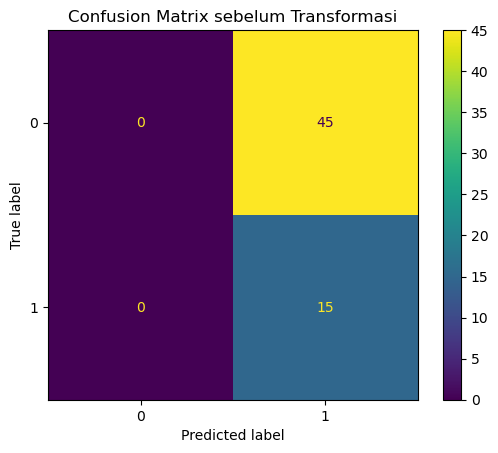

In [121]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, Y_test, cmap="viridis")
plt.title("Confusion Matrix sebelum Transformasi");

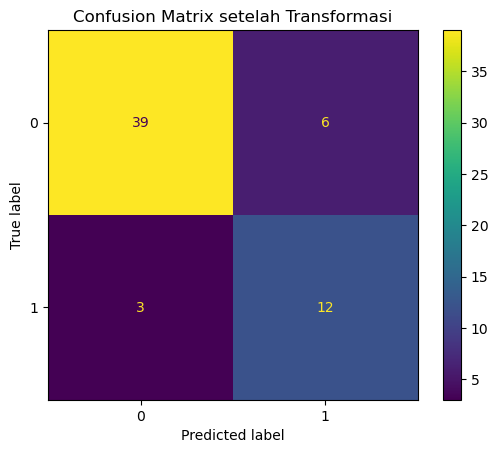

In [122]:
ConfusionMatrixDisplay.from_estimator(svm_model, scaled_X_test, Y_test, cmap="viridis")
plt.title("Confusion Matrix setelah Transformasi");

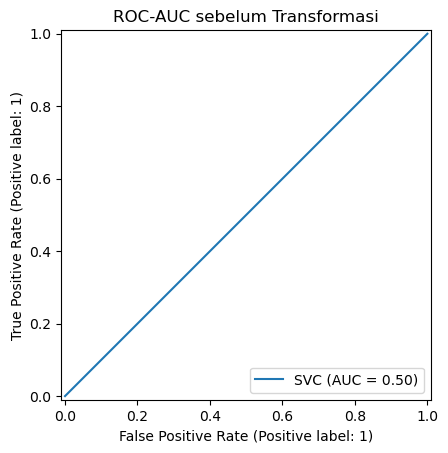

In [123]:
RocCurveDisplay.from_estimator(svm_model, X_test, Y_test)
plt.title("ROC-AUC sebelum Transformasi");

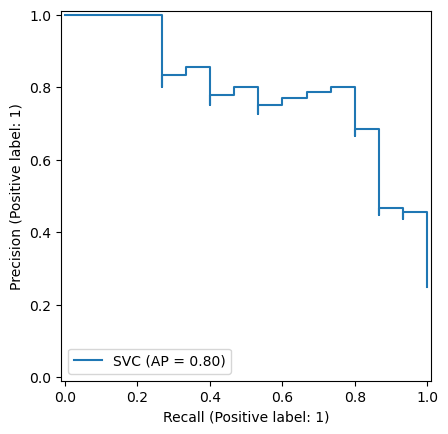

In [125]:
PrecisionRecallDisplay.from_estimator(svm_model, scaled_X_test, Y_test)

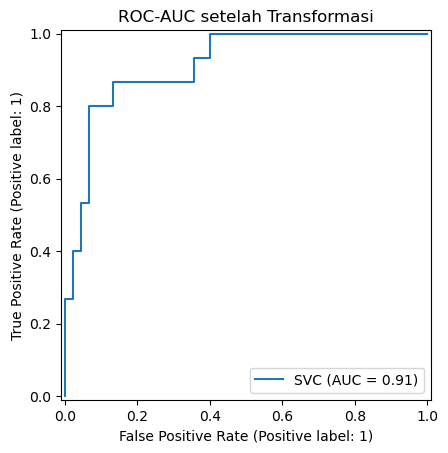

In [126]:
RocCurveDisplay.from_estimator(svm_model, scaled_X_test, Y_test)
plt.title("ROC-AUC setelah Transformasi");

In [ ]:
svm_model.intercept_

In [ ]:
coef_svm = svm_model.coef_.transpose()
index = data.columns[:-1]
col = ["Coefficient"]
coef_svm_table = pd.DataFrame(coef_svm, index=index, columns=col)
svm_table = coef_svm_table.sort_values("Coefficient")
svm_table
#svm_table.plot(kind="bar");

In [ ]:
plt.figure(figsize=(15,4), dpi=200)
svm_table.plot(kind="bar")
#plt.title("Besaran Koefisien tiap Fitur")
plt.xticks(rotation=75);

In [ ]:
for_svm = data[["age", "time", "DEATH_EVENT"]]
for_svm

In [ ]:
x = for_svm.drop("DEATH_EVENT", axis=1)
y = for_svm["DEATH_EVENT"]

mysvm = SVC(kernel="linear", 
                gamma="scale",
                degree=2,
                C=1.676832936811008,
                probability=True, 
                random_state=101, 
                max_iter=1000)

mysvm.fit(x, y)

In [ ]:
from svm_margin_plot import plot_svm_boundary

plot_svm_boundary(mysvm, x, y)

In [ ]:
mysvm.intercept_

## Model Prediction | Support Vector Machine

In [ ]:
svm_model.predict_proba(patient)

In [ ]:
svm_model.predict(patient)

## Model Building | Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
help(RandomForestClassifier)

In [ ]:
rfc_model = RandomForestClassifier(random_state=101)

In [ ]:
n_estimators = [32, 64, 100, 128, 200]
max_features = ["sqrt", "log2", "auto"]
bootstrap = [True, False]
oob_score = [True, False]
criterion = ["gini", "entropy", "log_loss"]

In [ ]:
rfc_grid = GridSearchCV(rfc_model, 
                        param_grid={"n_estimators":n_estimators,
                                    "max_features":max_features,
                                    "bootstrap":bootstrap,
                                    "oob_score":oob_score,
                                    "criterion":criterion})

In [ ]:
rfc_grid.fit(scaled_X_train, Y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'n_estimators': [32, 64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
rfc_grid.best_params_

In [ ]:
rfc_model = RandomForestClassifier(bootstrap=True,
                                   max_features="sqrt",
                                   n_estimators=100,
                                   oob_score=True,
                                   criterion="entropy",
                                   random_state=101)

In [ ]:
rfc_model.fit(scaled_X_train, Y_train)

In [ ]:
rfc_preds = rfc_model.predict(scaled_X_test)
rfc_preds

In [ ]:
rfc_proba = rfc_model.predict_proba(scaled_X_test)
rfc_proba

## Model Evaluation and Testing| Random Forest

In [ ]:
print("The total accuracy of your model is: ",accuracy_score(Y_test, rfc_preds))
print("\n")
print("The precision score of your model is: ",precision_score(Y_test, rfc_preds))
print("\n")
print("The recall score of your model is: ",recall_score(Y_test, rfc_preds))
print("\n")
print("The harmonic mean of your model is: ",f1_score(Y_test, rfc_preds))

In [ ]:
print(classification_report(Y_test, rfc_preds))

In [ ]:
ConfusionMatrixDisplay.from_estimator(rfc_model, scaled_X_test, Y_test);

In [ ]:
PrecisionRecallDisplay.from_estimator(rfc_model, scaled_X_test, Y_test);

In [ ]:
RocCurveDisplay.from_estimator(rfc_model, scaled_X_test, Y_test);

In [ ]:
fi_coeff = rfc_model.feature_importances_.transpose()
index = data.columns[:-1]
col = ["Feature Importance"]
fi_table = pd.DataFrame(fi_coeff, index=index, columns=col)
fi_table.sort_values("Feature Importance").plot(kind="bar");
fi_table.sort_values("Feature Importance")

In [ ]:
errors = []
misclassifications = []

for n in range(1,100):
    rfc_model = RandomForestClassifier(n_estimators=n, max_features="sqrt")
    rfc_model.fit(scaled_X_train, Y_train)
    predictions = rfc_model.predict(scaled_X_test)
    error = 1 - accuracy_score(Y_test, predictions)
    n_missed = np.sum(predictions != Y_test)
    
    errors.append(error)
    misclassifications.append(n_missed)

In [ ]:
plt.plot(range(1,100), errors);

In [ ]:
plt.plot(range(1,100), misclassifications)

## Model Prediction | Random Forest

In [ ]:
rfc_model.predict_proba(patient)

In [ ]:
rfc_model.predict(patient)

In [ ]:
data.describe().transpose()

In [ ]:
from scipy import stats

print("The mode of age feature is: ", stats.mode(data["age"]))
print("The mode of anaemia feature is: ", stats.mode(data["anaemia"]))
print("The mode of creatinine_phosphokinase feature is: ", stats.mode(data["creatinine_phosphokinase"]))
print("The mode of diabetes feature is: ", stats.mode(data["diabetes"]))
print("The mode of ejection_fraction feature is: ", stats.mode(data["ejection_fraction"]))
print("The mode of high_blood_pressure feature is: ", stats.mode(data["high_blood_pressure"]))
print("The mode of platelets feature is: ", stats.mode(data["platelets"]))
print("The mode of serum_creatinine feature is: ", stats.mode(data["serum_creatinine"]))
print("The mode of serum_sodium feature is: ", stats.mode(data["serum_sodium"]))
print("The mode of sex feature is: ", stats.mode(data["sex"]))
print("The mode of smoking feature is: ", stats.mode(data["smoking"]))
print("The mode of time feature is: ", stats.mode(data["time"]))

In [ ]:
import random
a1 = random.randrange(40,95)
b1 = random.randrange(0,2,1)
c1 = random.randrange(23, 7861) + random.random()
d1 = random.randrange(0,2,1)
e1 = random.randrange(14, 80) + random.random()
f1 = random.randrange(0,2,1)
g1 = random.randrange(25100, 850000)
h1 = random.randrange(0, 9) + random.random()
i1 = random.randrange(113, 148) + random.random()
j1 = random.randrange(0,2,1)
k1 = random.randrange(0,2,1)
l1 = random.randrange(4, 285)

print("age: ", a1)
print("anaemia: ", b1)
print("creatinine_phophokinase: ", c1)
print("diabetes: ", d1)
print("ejection_fraction: ", e1)
print("high_blood_pressure: ", f1)
print("platelets: ", g1)
print("serum_creatinine: ", h1)
print("serum_sodium: ", i1)
print("sex: ", j1)
print("smoking: ", k1)
print("time: ", l1)

In [ ]:
first_patient = [[a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1]]
#first_patient = [[44, 1, 4691.100060205147, 1, 17.435681378794687, 0, 728237, 5.454132517634943, 128.10746913642944, 1, 0, 158]]

In [ ]:
a2 = random.randrange(40,95)
b2 = random.randrange(0,2,1)
c2 = random.randrange(23, 7861) + random.random()
d2 = random.randrange(0,2,1)
e2 = random.randrange(14, 80) + random.random()
f2 = random.randrange(0,2,1)
g2 = random.randrange(25100, 850000)
h2 = random.randrange(0, 9) + random.random()
i2 = random.randrange(113, 148) + random.random()
j2 = random.randrange(0,2,1)
k2 = random.randrange(0,2,1)
l2 = random.randrange(4, 285)

print("age: ", a2)
print("anaemia: ", b2)
print("creatinine_phophokinase: ", c2)
print("diabetes: ", d2)
print("ejection_fraction: ", e2)
print("high_blood_pressure: ", f2)
print("platelets: ", g2)
print("serum_creatinine: ", h2)
print("serum_sodium: ", i2)
print("sex: ", j2)
print("smoking: ", k2)
print("time: ", l2)

In [ ]:
#second_patient = [[a2,b2,c2,d2,e2,f2,g2,h2,i2,j2,k2,l2]]
second_patient = [[74, 0, 7264.889919066418, 1, 16.809218881027764, 0, 402315, 1.6163419857945396, 140.08998488775697, 1, 1, 24]]

In [ ]:
a2,b2,c2,d2,e2,f2,g2,h2,i2,j2,k2,l2

In [ ]:
third_patient = [[88,
 1,
 4580.758958363176,
 0,
 49.07586594934372,
 0,
 349943,
 5.284113380610442,
 117.27174353446433,
 0,
 0,
 256]]

In [ ]:
print("The proba result from Logistic model: ", logistic_model.predict_proba(third_patient))
print("The DEATH_EVENT result from logistic model: ", logistic_model.predict(third_patient))
print("\n")
print("The proba result from SVM model: ", svm_model.predict_proba(third_patient))
print("The DEATH_EVENT result from SVM model: ", svm_model.predict(third_patient))
print("\n")
print("The proba result from Random Forets model: ", rfc_model.predict_proba(third_patient))
print("The DEATH_EVENT result from Random Forets model: ", rfc_model.predict(third_patient))

## Model Persistence

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [ ]:
X_val, X_holdout_test, Y_val, Y_holdout_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=101)

In [ ]:
scaled_X_train = third_scaler.fit_transform(X_train)
scaled_X_test = third_scaler.transform(X_test)

In [ ]:
first_model = LogisticRegression(solver="liblinear", 
                                    penalty="l2", 
                                    multi_class="ovr", 
                                    l1_ratio=0.0, 
                                    C=3.593813663804626,
                                    max_iter=1000)
second_model = SVC(kernel="linear", 
                gamma="auto",
                degree=2,
                C=4.2919342601287775,
                probability=True, 
                random_state=101, 
                max_iter=1000)

third_model = RandomForestClassifier(bootstrap=True,
                                   max_features="sqrt",
                                   n_estimators=100,
                                   oob_score=True,
                                   criterion="entropy",
                                   random_state=101)

In [ ]:
first_model.fit(X_train, Y_train)
second_model.fit(X_train, Y_train)
third_model.fit(X_train, Y_train)

In [ ]:
first_val_pred = first_model.predict(X_val)
second_val_pred = second_model.predict(X_val)
third_val_pred = third_model.predict(X_val)

In [ ]:
print(classification_report(Y_val, first_val_pred))
print(classification_report(Y_val, second_val_pred))
print(classification_report(Y_val, third_val_pred))

In [ ]:
print("The total accuracy of your model is: ",accuracy_score(Y_val, first_val_pred))
print("\n")
print("The precision score of your model is: ",precision_score(Y_val, first_val_pred))
print("\n")
print("The recall score of your model is: ",recall_score(Y_val, first_val_pred))
print("\n")
print("The harmonic mean of your model is: ",f1_score(Y_val, first_val_pred))

In [ ]:
print("The total accuracy of your model is: ",accuracy_score(Y_val, second_val_pred))
print("\n")
print("The precision score of your model is: ",precision_score(Y_val, second_val_pred))
print("\n")
print("The recall score of your model is: ",recall_score(Y_val, second_val_pred))
print("\n")
print("The harmonic mean of your model is: ",f1_score(Y_val, second_val_pred))

In [ ]:
print("The total accuracy of your model is: ",accuracy_score(Y_val, third_val_pred))
print("\n")
print("The precision score of your model is: ",precision_score(Y_val, third_val_pred))
print("\n")
print("The recall score of your model is: ",recall_score(Y_val, third_val_pred))
print("\n")
print("The harmonic mean of your model is: ",f1_score(Y_val, third_val_pred))

In [ ]:
first_test_pred = first_model.predict(X_holdout_test)
first_test_pred_prob = first_model.predict_proba(X_holdout_test)
second_test_pred = second_model.predict(X_holdout_test)
second_test_pred_prob = second_model.predict_proba(X_holdout_test)
third_test_pred = third_model.predict(X_holdout_test)
third_test_pred_prob = third_model.predict_proba(X_holdout_test)

In [ ]:
print("Probability from Logistic model got: ", first_model.predict_proba(first_patient))
print("Class type from Logistic model is: ", first_model.predict(first_patient))
print("Probability from SVM model got: ", second_model.predict_proba(first_patient))
print("Class type from SVM model is: ", second_model.predict(first_patient))
print("Probability from Random Forest model got: ", third_model.predict_proba(first_patient))
print("Class type from Random Forest model is: ", third_model.predict(first_patient))

In [ ]:
print("Probability from Logistic model got: ", first_model.predict_proba(second_patient))
print("Class type from Logistic model is: ", first_model.predict(second_patient))
print("Probability from SVM model got: ", second_model.predict_proba(second_patient))
print("Class type from SVM model is: ", second_model.predict(second_patient))
print("Probability from Random Forest model got: ", third_model.predict_proba(second_patient))
print("Class type from Random Forest model is: ", third_model.predict(second_patient))

In [ ]:
print("Probability from Logistic model got: ", first_model.predict_proba(third_patient))
print("Class type from Logistic model is: ", first_model.predict(third_patient))
print("Probability from SVM model got: ", second_model.predict_proba(third_patient))
print("Class type from SVM model is: ", second_model.predict(third_patient))
print("Probability from Random Forest model got: ", third_model.predict_proba(third_patient))
print("Class type from Random Forest model is: ", third_model.predict(third_patient))

In [ ]:
print(classification_report(Y_holdout_test, first_test_pred))
print(classification_report(Y_holdout_test, second_test_pred))
print(classification_report(Y_holdout_test, third_test_pred))

In [ ]:
first_model.fit(X, Y)
second_model.fit(X, Y)
third_model.fit(X, Y)

In [ ]:
import joblib

In [ ]:
joblib.dump(first_model, "first_model.pkl")
joblib.dump(second_model, "second_model.pkl")
joblib.dump(third_model, "third_model.pkl")

In [ ]:
list(X.columns)

In [ ]:
joblib.dump(list(X.columns), "column_names.pkl")

In [ ]:
col_names = joblib.load("column_names.pkl")

In [ ]:
col_names

In [ ]:
load_first_model = joblib.load("first_model.pkl")
load_second_model = joblib.load("second_model.pkl")
load_third_model = joblib.load("third_model.pkl")

In [ ]:
load_third_model.predict_proba(first_patient)
load_third_model.predict(first_patient)